In [113]:
from __future__ import unicode_literals
# -*- coding: utf-8 -*
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pickle
import re
import matplotlib
from collections import Counter,defaultdict
from matplotlib.font_manager import FontProperties
import numpy as np


%matplotlib inline

In [2]:
with open('data/emoji_tweets.pkl', 'r') as f:
    emoji_tweets = pickle.load(f)

In [3]:
REGEX = u"[\U00002712\U00002714\U00002716\U0000271d\U00002721\U00002728\U00002733\U00002734\U00002744\U00002747\U0000274c\U0000274e\U00002753-\U00002755\U00002757\U00002763\U00002764\U00002795-\U00002797\U000027a1\U000027b0\U000027bf\U00002934\U00002935\U00002b05-\U00002b07\U00002b1b\U00002b1c\U00002b50\U00002b55\U00003030\U0000303d\U0001f004\U0001f0cf\U0001f170\U0001f171\U0001f17e\U0001f17f\U0001f18e\U0001f191-\U0001f19a\U0001f201\U0001f202\U0001f21a\U0001f22f\U0001f232-\U0001f23a\U0001f250\U0001f251\U0001f300-\U0001f321\U0001f324-\U0001f393\U0001f396\U0001f397\U0001f399-\U0001f39b\U0001f39e-\U0001f3f0\U0001f3f3-\U0001f3f5\U0001f3f7-\U0001f4fd\U0001f4ff-\U0001f53d\U0001f549-\U0001f54e\U0001f550-\U0001f567\U0001f56f\U0001f570\U0001f573-\U0001f579\U0001f587\U0001f58a-\U0001f58d\U0001f590\U0001f595\U0001f596\U0001f5a5\U0001f5a8\U0001f5b1\U0001f5b2\U0001f5bc\U0001f5c2-\U0001f5c4\U0001f5d1-\U0001f5d3\U0001f5dc-\U0001f5de\U0001f5e1\U0001f5e3\U0001f5ef\U0001f5f3\U0001f5fa-\U0001f64f\U0001f680-\U0001f6c5\U0001f6cb-\U0001f6d0\U0001f6e0-\U0001f6e5\U0001f6e9\U0001f6eb\U0001f6ec\U0001f6f0\U0001f6f3\U0001f910-\U0001f918\U0001f980-\U0001f984\U0001f9c0\U00003297\U00003299\U000000a9\U000000ae\U0000203c\U00002049\U00002122\U00002139\U00002194-\U00002199\U000021a9\U000021aa\U0000231a\U0000231b\U00002328\U00002388\U000023cf\U000023e9-\U000023f3\U000023f8-\U000023fa\U000024c2\U000025aa\U000025ab\U000025b6\U000025c0\U000025fb-\U000025fe\U00002600-\U00002604\U0000260e\U00002611\U00002614\U00002615\U00002618\U0000261d\U00002620\U00002622\U00002623\U00002626\U0000262a\U0000262e\U0000262f\U00002638-\U0000263a\U00002648-\U00002653\U00002660\U00002663\U00002665\U00002666\U00002668\U0000267b\U0000267f\U00002692-\U00002694\U00002696\U00002697\U00002699\U0000269b\U0000269c\U000026a0\U000026a1\U000026aa\U000026ab\U000026b0\U000026b1\U000026bd\U000026be\U000026c4\U000026c5\U000026c8\U000026ce\U000026cf\U000026d1\U000026d3\U000026d4\U000026e9\U000026ea\U000026f0-\U000026f5\U000026f7-\U000026fa\U000026fd\U00002702\U00002705\U00002708-\U0000270d\U0000270f]|[#]\U000020e3|[*]\U000020e3|[0]\U000020e3|[1]\U000020e3|[2]\U000020e3|[3]\U000020e3|[4]\U000020e3|[5]\U000020e3|[6]\U000020e3|[7]\U000020e3|[8]\U000020e3|[9]\U000020e3|\U0001f1e6[\U0001f1e8-\U0001f1ec\U0001f1ee\U0001f1f1\U0001f1f2\U0001f1f4\U0001f1f6-\U0001f1fa\U0001f1fc\U0001f1fd\U0001f1ff]|\U0001f1e7[\U0001f1e6\U0001f1e7\U0001f1e9-\U0001f1ef\U0001f1f1-\U0001f1f4\U0001f1f6-\U0001f1f9\U0001f1fb\U0001f1fc\U0001f1fe\U0001f1ff]|\U0001f1e8[\U0001f1e6\U0001f1e8\U0001f1e9\U0001f1eb-\U0001f1ee\U0001f1f0-\U0001f1f5\U0001f1f7\U0001f1fa-\U0001f1ff]|\U0001f1e9[\U0001f1ea\U0001f1ec\U0001f1ef\U0001f1f0\U0001f1f2\U0001f1f4\U0001f1ff]|\U0001f1ea[\U0001f1e6\U0001f1e8\U0001f1ea\U0001f1ec\U0001f1ed\U0001f1f7-\U0001f1fa]|\U0001f1eb[\U0001f1ee-\U0001f1f0\U0001f1f2\U0001f1f4\U0001f1f7]|\U0001f1ec[\U0001f1e6\U0001f1e7\U0001f1e9-\U0001f1ee\U0001f1f1-\U0001f1f3\U0001f1f5-\U0001f1fa\U0001f1fc\U0001f1fe]|\U0001f1ed[\U0001f1f0\U0001f1f2\U0001f1f3\U0001f1f7\U0001f1f9\U0001f1fa]|\U0001f1ee[\U0001f1e8-\U0001f1ea\U0001f1f1-\U0001f1f4\U0001f1f6-\U0001f1f9]|\U0001f1ef[\U0001f1ea\U0001f1f2\U0001f1f4\U0001f1f5]|\U0001f1f0[\U0001f1ea\U0001f1ec-\U0001f1ee\U0001f1f2\U0001f1f3\U0001f1f5\U0001f1f7\U0001f1fc\U0001f1fe\U0001f1ff]|\U0001f1f1[\U0001f1e6-\U0001f1e8\U0001f1ee\U0001f1f0\U0001f1f7-\U0001f1fb\U0001f1fe]|\U0001f1f2[\U0001f1e6\U0001f1e8-\U0001f1ed\U0001f1f0-\U0001f1ff]|\U0001f1f3[\U0001f1e6\U0001f1e8\U0001f1ea-\U0001f1ec\U0001f1ee\U0001f1f1\U0001f1f4\U0001f1f5\U0001f1f7\U0001f1fa\U0001f1ff]|\U0001f1f4\U0001f1f2|\U0001f1f5[\U0001f1e6\U0001f1ea-\U0001f1ed\U0001f1f0-\U0001f1f3\U0001f1f7-\U0001f1f9\U0001f1fc\U0001f1fe]|\U0001f1f6\U0001f1e6|\U0001f1f7[\U0001f1ea\U0001f1f4\U0001f1f8\U0001f1fa\U0001f1fc]|\U0001f1f8[\U0001f1e6-\U0001f1ea\U0001f1ec-\U0001f1f4\U0001f1f7-\U0001f1f9\U0001f1fb\U0001f1fd-\U0001f1ff]|\U0001f1f9[\U0001f1e6\U0001f1e8\U0001f1e9\U0001f1eb-\U0001f1ed\U0001f1ef-\U0001f1f4\U0001f1f7\U0001f1f9\U0001f1fb\U0001f1fc\U0001f1ff]|\U0001f1fa[\U0001f1e6\U0001f1ec\U0001f1f2\U0001f1f8\U0001f1fe\U0001f1ff]|\U0001f1fb[\U0001f1e6\U0001f1e8\U0001f1ea\U0001f1ec\U0001f1ee\U0001f1f3\U0001f1fa]|\U0001f1fc[\U0001f1eb\U0001f1f8]|\U0001f1fd\U0001f1f0|\U0001f1fe[\U0001f1ea\U0001f1f9]|\U0001f1ff[\U0001f1e6\U0001f1f2\U0001f1fc]|[0-9*#]\ufe0f\u20e3"


In [111]:
emojis = []

for tweet in emoji_tweets:
    emojis += re.findall(REGEX, tweet)

In [5]:
emoji_cnt = Counter(emojis)

In [6]:
df = pd.DataFrame(data={'emoji':emoji_cnt.keys(), 'count':emoji_cnt.values()})

In [7]:
df.sort('count', ascending=False, inplace=True)

/home/han/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [8]:
df.index = df['emoji']

In [77]:
sns.set(style="white", context="talk")


(0, 1.05)

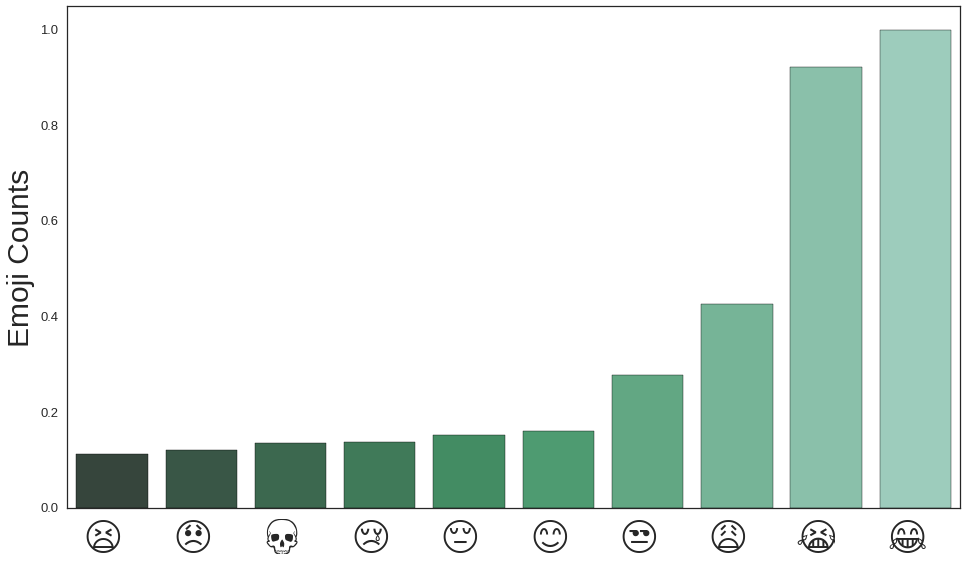

In [152]:
fig = plt.figure(figsize=(16,9))
ax= fig.add_subplot(111)
sns.barplot(range(10), cnt, palette="BuGn_d", ax=ax)
ax.set_fontsize=20
ax.set_xticks(np.arange(10)-0.1)
ax.set_xticklabels(momo, **{'fontname':'Symbola', 'size':40})
ax.set_ylabel('Emoji Counts',**{ 'size':30})
ax.set_ylim(0,1.05)


In [97]:
fig.savefig('Emoji_count.png')

In [94]:
cnt = []
momo = []
for i in [0,1,2,3,4,8,9,11,14, 15]:
    cnt.insert(0, df.ix[i]['count'])
    momo.insert(0, df.ix[i]['emoji'])

In [95]:
for i, c in enumerate(cnt):
    cnt[i] = c/25974.

# sentiment analysis

In [98]:
with open('model/NB.pkl', 'r') as f:
    NB = pickle.load(f)
with open('model/Tfidf.pkl', 'r') as f:
    Tfidf  = pickle.load(f)


In [99]:
Tfidf_tweet = Tfidf.transform(emoji_tweets)

In [103]:
sent_tweets = NB.predict_proba(Tfidf_tweet)[:,1]

In [104]:
sent_tweets

array([ 0.17486864,  0.35412986,  0.49750614, ...,  0.77432223,
        0.85465349,  0.51058072])

In [107]:
tweet_bins=[]
for prob in sent_tweets:
    if prob < 0.25:
        sen = 1.
    elif prob < 0.5 and prob >=0.25:
        sen = 2.
    elif prob < 0.75 and prob >=0.5:
        sen = 3.
    else:
        sen = 4.

    tweet_bins.append(sen)


In [109]:
tweet_bins

94235

In [112]:
all_emojis = []

for tweet in emoji_tweets:
    all_emojis.append( re.findall(REGEX, tweet))

In [131]:
senti_condFreq = defaultdict(Counter)

In [132]:
for idx, emjs in enumerate(all_emojis):
    for emj in emjs:
        senti_condFreq[tweet_bins[idx]][emj] += 1

In [212]:
df_1 = pd.DataFrame({'emoji':zip(*senti_condFreq[4].most_common())[0][:20] , 'count':zip(*senti_condFreq[4.0].most_common())[1][:20]})

In [214]:
df_1
cnt = []
momo = []
for i in [0,1,2,3,4,6,8,9,10,12]:
    cnt.insert(0, df_1.ix[i]['count'])
    momo.insert(0, df_1.ix[i]['emoji'])
for i, c in enumerate(cnt):
    cnt[i] = c/2459.

In [213]:
df_1


,count,emoji
0,2459,❤
1,1248,😂
2,1082,😍
3,995,🎉
4,894,😊
5,875,🏼
6,868,😘
7,821,🏻
8,735,💕
9,690,🙌


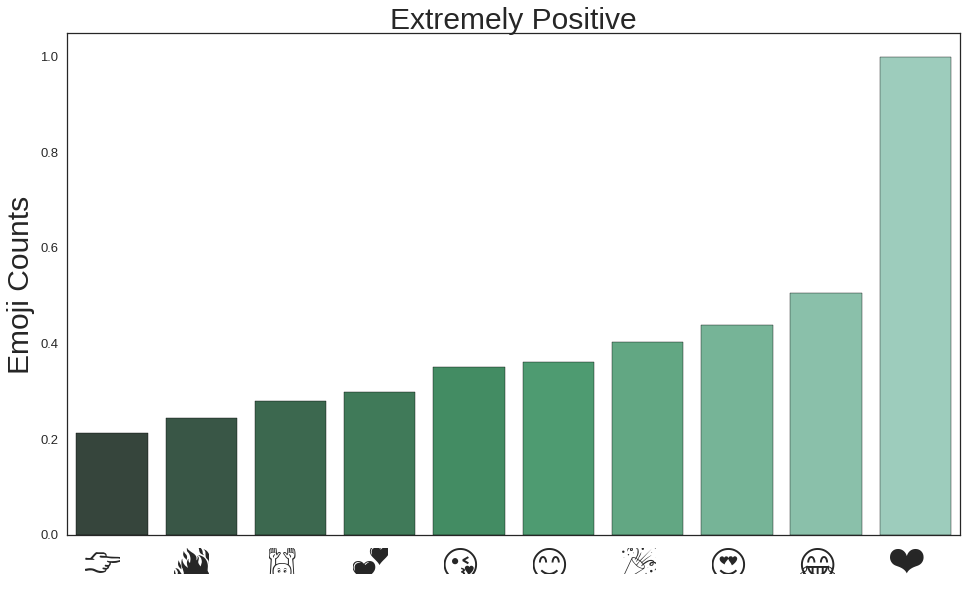

In [224]:
fig = plt.figure(figsize=(16,9))
ax= fig.add_subplot(111)
sns.barplot(range(10), cnt, palette="BuGn_d", ax=ax, label='Extemely Positive')
ax.set_fontsize=20
ax.set_xticks(np.arange(10)-0.1)
ax.set_xticklabels(momo, **{'fontname':'Symbola', 'size':40})
ax.set_ylabel('Emoji Counts',**{ 'size':30})
ax.set_ylim(0,1.05)
plt.title('Extremely Positive', **{'size':30})
# plt.savefig('extremely_positive.png')

In [217]:
bin_count = []

for k in senti_condFreq:
    bin_count.append(sum(senti_condFreq[k].values()))

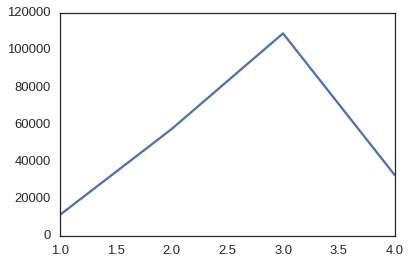

In [219]:
plt.plot(range(1,5), bin_count)

In [220]:
sum(bin_count)

209845

In [ ]:
with open('senti_condFreq.pkl', 'wb') as f:
    senti_condFreq